### **Imports**:

In [ ]:
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_new = pd.read_csv('compare_adsum.csv')
df_new.head(3)

,ItemID,HasText,abstract,CsAbstract,summary,CsSummery
0,8597014,1,1,0.895780,0,NaN
1,4649030,1,1,0.223573,0,NaN
2,5174074,1,0,NaN,0,NaN


### **Filter out articles containing 'adverse text' (text filtered from search keywords):**

In [ ]:
df2 = df_new[df_new['HasText'] == 1]
df2.head(3)

,ItemID,HasText,abstract,CsAbstract,summary,CsSummery
0,8597014,1,1,0.895780,0,NaN
1,4649030,1,1,0.223573,0,NaN
2,5174074,1,0,NaN,0,NaN


Total articles containing 'adverse text':

In [ ]:
len(df2)

5912

### **Cosine similarity between 'adverse text' and 'abstract':**

In [ ]:
df3 = df2[df2['abstract'] == 1].sort_values('CsAbstract')
df3.head(3)

,ItemID,HasText,abstract,CsAbstract,summary,CsSummery
5614,8349956,1,1,-0.207998,0,NaN
1180,7658834,1,1,-0.185002,0,NaN
3297,8299381,1,1,-0.147547,0,NaN


Total articles containing 'abstract':

In [ ]:
len(df3)

5023

Cosine similarity:

(array([   5.,  107., 1114., 1833., 1063.,  335.,  153.,  121.,  108.,
         184.]),
 array([-0.20799784, -0.08719806,  0.03360173,  0.15440151,  0.2752013 ,
         0.39600108,  0.51680086,  0.63760065,  0.75840043,  0.87920022,
         1.        ]),
 <a list of 10 Patch objects>)

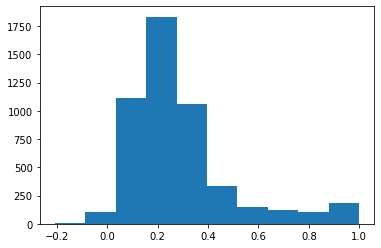

In [ ]:
plt.hist(df3['CsAbstract'])

In [ ]:
len(df3[df3['CsAbstract'] >= 0.7])

355

In [ ]:
len(df3[df3['CsAbstract'] >= 0.7])/len(df3['CsAbstract'])*100

7.067489548078837

**Only 7.06% abstract texts has larger cosine similarity (at least 70%).**

### **Cosine similarity between 'adverse text' and 'summary':**


In [ ]:
df4 = df2[df2['summary'] == 1].sort_values('CsSummery')
df4.head(3)

,ItemID,HasText,abstract,CsAbstract,summary,CsSummery
446,6012874,1,0,NaN,1,-0.020916
6092,4706970,1,1,0.741284,1,0.004316
6041,5436753,1,0,NaN,1,0.032629


Total articles containing 'summary':

In [ ]:
len(df4)

120

Cosine similarity:

(array([12., 34., 38., 13., 17.,  0.,  2.,  1.,  1.,  2.]),
 array([-0.02091628,  0.07894017,  0.17879663,  0.27865308,  0.37850953,
         0.47836599,  0.57822244,  0.6780789 ,  0.77793535,  0.87779181,
         0.97764826]),
 <a list of 10 Patch objects>)

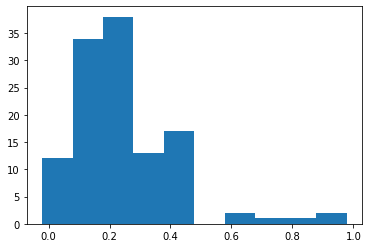

In [ ]:
plt.hist(df4['CsSummery'])

In [ ]:
len(df4[df4['CsSummery'] >= 0.7])

4

In [ ]:
len(df4[df4['CsSummery'] >= 0.7])/len(df4['CsSummery'])*100

3.3333333333333335

**Only 3.33% summary texts has larger cosine similarity (at least 70%).**